In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stc
%load_ext autoreload
%autoreload 2


## load data

Saved data in Matlab using the following command:
```
save 0626.mat stim spike_train channel_names sampling_rate width height -v7.3
```

In [2]:
# load stim and spike data
filename = "data/0626.mat"

stim, spike_train, info = pysta.load_data(filename)

List of arrays in this file: 
 <KeysViewHDF5 ['#refs#', 'channel_names', 'height', 'sampling_rate', 'spike_train', 'stim', 'width']>
Shape of the array stim:  (64, 9000)
Shape of the array spike_train:  (156, 9000)
length of the list channel_names:  156
sampling_rate:  10.0


(-0.5, 7.5, 7.5, -0.5)

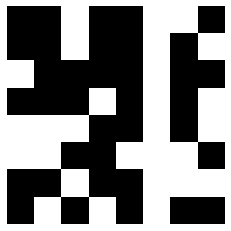

In [3]:
# plot stim
plt.imshow(stim.reshape([8,8,-1])[:,:,0], cmap="gray")
plt.axis('off')

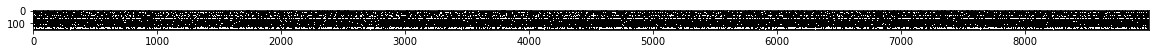

In [4]:
# plot spike trains
plt.figure(figsize=(20,15))
plt.imshow(spike_train, cmap='gray', vmin=0, vmax=1)

(array([1.315737e+06, 5.875900e+04, 1.880800e+04, 8.754000e+03,
        1.100000e+03, 4.480000e+02, 3.350000e+02, 3.500000e+01,
        1.600000e+01, 8.000000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

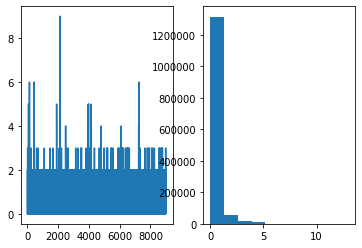

In [5]:
# plot for one channel
plt.subplot(121)
plt.plot(spike_train[0,:])
plt.subplot(122)
plt.hist(spike_train.reshape([-1,1]))

In [6]:
info["channel_names"]

['ch_12a',
 'ch_12b',
 'ch_12c',
 'ch_13a',
 'ch_13b',
 'ch_13c',
 'ch_13d',
 'ch_13e',
 'ch_14a',
 'ch_14b',
 'ch_14c',
 'ch_14d',
 'ch_16a',
 'ch_16b',
 'ch_16c',
 'ch_17a',
 'ch_17b',
 'ch_17c',
 'ch_17d',
 'ch_21a',
 'ch_21b',
 'ch_21c',
 'ch_21d',
 'ch_21e',
 'ch_22a',
 'ch_22b',
 'ch_23a',
 'ch_23b',
 'ch_23c',
 'ch_23d',
 'ch_25a',
 'ch_25b',
 'ch_25c',
 'ch_26a',
 'ch_26b',
 'ch_26c',
 'ch_26d',
 'ch_27a',
 'ch_27b',
 'ch_27c',
 'ch_27d',
 'ch_28a',
 'ch_28b',
 'ch_28c',
 'ch_31a',
 'ch_31b',
 'ch_31c',
 'ch_31d',
 'ch_32a',
 'ch_32b',
 'ch_32c',
 'ch_33a',
 'ch_33b',
 'ch_33c',
 'ch_33d',
 'ch_35a',
 'ch_35b',
 'ch_35c',
 'ch_35d',
 'ch_35e',
 'ch_35f',
 'ch_35g',
 'ch_36a',
 'ch_36b',
 'ch_36c',
 'ch_36d',
 'ch_37a',
 'ch_37b',
 'ch_37c',
 'ch_37d',
 'ch_37e',
 'ch_38a',
 'ch_41a',
 'ch_41b',
 'ch_41c',
 'ch_41d',
 'ch_42a',
 'ch_42b',
 'ch_42c',
 'ch_43a',
 'ch_43b',
 'ch_43c',
 'ch_45a',
 'ch_45b',
 'ch_45c',
 'ch_46a',
 'ch_46b',
 'ch_47a',
 'ch_48a',
 'ch_48b',
 'ch_48c',

## grab spike-triggered stim

In [7]:
tap = 10

spike_triggered_stim_all_channels, spike_count_all_channels = pysta.grab_spike_triggered_stim_all_channels(stim, spike_train,tap)


In [8]:
print(len(spike_triggered_stim_all_channels))

print(spike_triggered_stim_all_channels[0].shape)

# print(len(spike_trigered_stim))
# print(spike_trigered_stim[0].shape)
# print(np.sum(spike_count))

156
(2867, 64, 10)


## STA

In [10]:
# choose channel
channel_name = "12a"
#channel_name = "14b"
#channel_name = "54a"
#channel_name = "33b"
#channel_name = "36c"  # for STC

ch_idx = pysta.find_channel_index(info["channel_names"], channel_name)

#ch_idx = 52  # ch_33b
# ch_idx = 64  # ch_36c
print(info["channel_names"][ch_idx])

print(spike_triggered_stim_all_channels[ch_idx].shape)


ch_12a
(2867, 64, 10)


In [11]:
# calc sta
#sta = np.mean(spike_triggered_stim_all_channels[ch_idx],axis=0)
sta = np.average(spike_triggered_stim_all_channels[ch_idx], weights=spike_count_all_channels[ch_idx], axis=0)
print(sta.shape)

(64, 10)


0.4993082604266538 0.018414242021382102


Text(0.5, 1.0, '12a, mean=0.50, std=0.02')

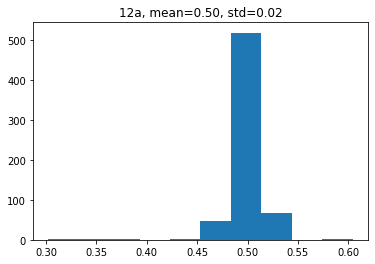

In [12]:
# calc mean and std of sta
m = np.mean(sta.ravel())
sig = np.std(sta.ravel())

print(m, sig)
plt.hist(sta.reshape([-1,1]))
plt.title("{}, mean={:.2f}, std={:.2f}".format(channel_name,m,sig))

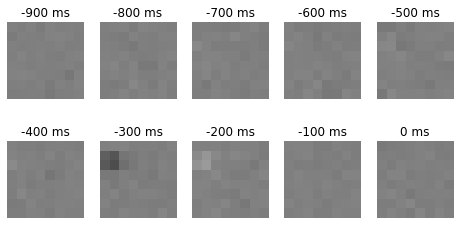

In [18]:
pysta.plot_stim_slices(sta, 8, 8, dt=100)
# plt.savefig

In [13]:
## calc STA for all channels

In [14]:
num_samples = spike_triggered_stim_all_channels[ch_idx].shape[0]
print(num_samples)

data = spike_triggered_stim_all_channels[ch_idx].reshape(num_samples, -1)
print(data.shape)

dim = data.shape[1]

weights = spike_count_all_channels[ch_idx]
print(weights.shape)

655
(655, 640)
(655,)


In [15]:
# add some reference points
#sta = np.mean(data,axis=0, keepdims=True)
sta = np.average(data, weights=spike_count_all_channels[ch_idx], axis=0)
all_one = np.ones([1,dim])
all_zero = np.zeros([1,dim])

In [16]:
data.shape

(655, 640)

In [17]:
sta.shape

(640,)

## run sta_batch.py
```
python3 sta_batch.py 
```

(156,)
(156,)


Text(0, 0.5, 'log var')

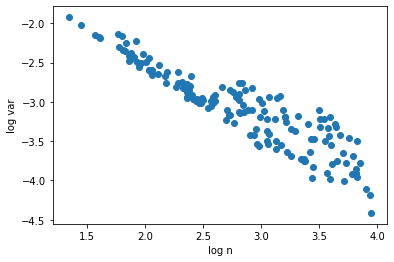

In [18]:
# load & analyze results
sigs= np.loadtxt("sta/sta_sigs.txt") #.reshape([-1,1])
print(sigs.shape)
num_samples = np.loadtxt("sta/num_samples.txt") # .reshape([-1,1])
print(num_samples.shape)

plt.scatter(np.log10(num_samples), 2*np.log10(sigs))
plt.xlabel("log n")
plt.ylabel("log var")



0.6508036074759929


Text(0.5, 0, 'n var(S)')

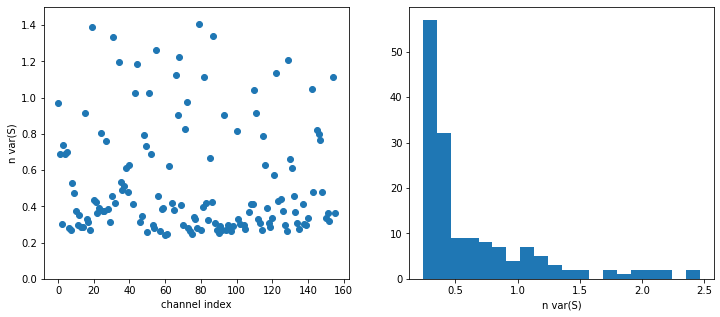

In [19]:
print(np.mean(sigs**2 * num_samples))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(sigs**2 * num_samples, 'o')
plt.ylabel("n var(S)")
plt.xlabel("channel index")
plt.ylim([0,1.5])

plt.subplot(1,2,2)
plt.hist(sigs**2 * num_samples, 20)
plt.xlabel("n var(S)")

156


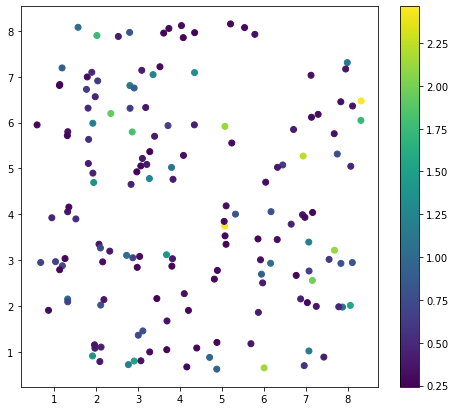

In [20]:
# plot var_num values on MEA
var_num = sigs**2 * num_samples
print(len(var_num))

plt.figure(figsize=(8,7))
pysta.plot_on_MEA(info["channel_names"], var_num)
plt.colorbar()

11
['ch_26a', 'ch_28a', 'ch_36b', 'ch_54a', 'ch_56a', 'ch_61a', 'ch_72a', 'ch_75a', 'ch_83a', 'ch_86a', 'ch_87a']
[1.92899492 1.7479277  1.8005571  2.44336884 2.11602912 2.13681751
 1.98431442 2.23197376 2.11230873 1.7307593  2.46414066]


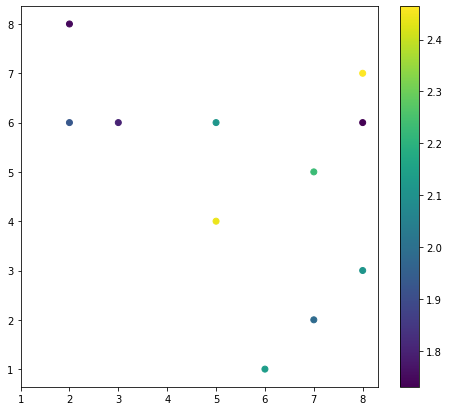

In [21]:
# look at those channels with high var*num product
th = 1.6
idx = np.where(var_num.ravel() > th)

# num_idx = len(idx[0])
# print(num_idx)
chosen_channel_names = [info["channel_names"][i] for i in idx[0]]
print(len(chosen_channel_names))
print(chosen_channel_names)

print(var_num[idx])

plt.figure(figsize=(8,7))
ticks = np.linspace(1,8,8)
pysta.plot_on_MEA(chosen_channel_names, var_num[idx], perturbation_size=0, xticks=ticks, yticks=ticks)
plt.colorbar()

# pert = 0.3*np.random.randn(len(idx[0]),2)
# plt.scatter(X[idx]+pert[:,0], Y[idx]+pert[:,1], c=var_num[idx])
# plt.colorbar()

In [22]:
idx = pysta.find_channel_index(info["channel_names"], "54")
print(idx)

info["channel_names"][idx]

99


'ch_54a'

In [23]:
var_num[99], var_num[100],var_num[101],var_num[101] # ch_54a 

(2.443368842270157,
 0.818067382930895,
 0.32729750409508185,
 0.32729750409508185)

In [24]:
num_samples[idx]

3138.0

## visualization by t-SNE  (VERY SLOW)

In [25]:
concatenated_data = np.concatenate([sta, all_one, all_zero, -all_one, data], axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
from tsne.tsne_python.tsne import *

In [ ]:
tsne = tsne(concatenated_data)

In [ ]:
def plot_tsne_result(tsne):
    plt.figure(figsize=(15,13))
    
    plt.scatter(tsne[3:,0],tsne[3:,1], c=(0.5,0.5,0.5))#colors=(0,0,0))
    plt.scatter(tsne[0,0],tsne[0,1], c=(0,0,0), marker='s')  # sta
    plt.scatter(tsne[1,0],tsne[1,1], c=(1,0,0), marker="^")  # all one
    plt.scatter(tsne[2,0],tsne[2,1], c=(0,1,0), marker="o")  # all zero
    plt.scatter(tsne[3,0],tsne[3,1], c=(0,0,1), marker="v")  # all negative one

    plt.legend(["stim", "sta", "all one", "all zero", "all negative one"])


plot_tsne_result(tsne)    
plt.savefig("figure/{}_tsne.pdf".format(channel_names[ch_idx]))
plt.savefig("figure/{}_tsne.png".format(channel_names[ch_idx]))

## STC

In [ ]:
center = np.mean(data, axis=0, keepdims=True)
data_centered = data - center

In [ ]:
covariance_mat = stc.calc_covariance_matrix(data_centered)
#robust_covariance_mat = make_robust_covariance_mat(data_centered, centered=True)

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(covariance_mat.reshape(-1,1))
plt.subplot(122)
cc = covariance_mat.copy()
cc[range(dim),range(dim)] = np.nan  # remove diagonal element
plt.imshow(cc)

In [ ]:
eig_values, eig_vectors = stc.calc_eig_values_and_vectors(covariance_mat)

plt.plot(eig_values, '*:')

print(eig_values[-1])

In [ ]:
# project 
projected = stc.project(data_centered, eig_vectors)# [:,0:7]

projected_all_one = stc.project(np.ones([1,dim]) - center, eig_vectors)
projected_all_zero = stc.project(np.zeros([1,dim]) - center, eig_vectors)

plt.scatter(projected[:,0], projected[:,1], color='k')
plt.scatter(projected_all_one[:,0], projected_all_one[:,1], color='r', marker='^')
plt.scatter(projected_all_zero[:,0], projected_all_zero[:,1], color='b', marker='v')

In [ ]:
# plot STA
plot_stim_slices(sta, 8,8)

In [ ]:
# plot 1st eigenvector of STC
plot_stim_slices(eig_vectors[:,0], 8, 8, -0.1, 0.1)

In [ ]:
# plot last eigenvector of STC
plot_stim_slices(eig_vectors[:,-1], 8, 8, -0.1, 0.1)

## robust STC

In [ ]:
robust_covariance_mat = stc.calc_robust_covariance_mat(data_centered, centered=True)



In [ ]:
def plot_covariance_matrix(covariance_mat):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.hist(covariance_mat.reshape(-1,1))
    plt.subplot(122)
    cc = covariance_mat.copy()
    cc[range(dim),range(dim)] = np.nan  # remove diagonal element
    plt.imshow(cc)

plot_covariance_matrix(robust_covariance_mat)

In [ ]:
plt.scatter(covariance_mat, robust_covariance_mat)
plt.xlabel('classical cov')
plt.ylabel('robust cov')

In [ ]:
robust_eig_values, robust_eig_vectors = stc.calc_eig_values_and_vectors(robust_covariance_mat)

plt.plot(eig_values, '*:')
plt.plot(robust_eig_values, '*:')
plt.legend(['classic', 'robust'])

In [ ]:
robust_projected = stc.project(data_centered, robust_eig_vectors)# [:,0:7]

robust_projected_all_one = project(np.ones([1,dim])-np.mean(data_centered,axis=0,keepdims=True), robust_eig_vectors)# [:,0:7]
robust_projected_all_one = project(np.ones([1,dim])-np.mean(data_centered,axis=0,keepdims=True), robust_eig_vectors)# [:,0:7]
robust_projected_all_negative_one = project(-np.ones([1,dim])-np.mean(data_centered,axis=0,keepdims=True), robust_eig_vectors)# [:,0:7]

In [ ]:
plt.scatter(robust_projected[:,0], robust_projected[:,1], color='k')
plt.scatter(robust_projected_all_one[:,0], robust_projected_all_one[:,1], color='r', marker='^')
plt.scatter(robust_projected_all_negative_one[:,0], robust_projected_all_negative_one[:,1], color='b', marker='v')

In [ ]:
plot_stim_slices(robust_eig_vectors[:,0], 8, 8, -0.1, 0.1)

In [ ]:
plot_stim_slices(robust_eig_vectors[:,-1], 8, 8, -0.1, 0.1)

## for batch

run
```
python3 sta_batch.py
```

## analyze results

In [ ]:
stc_eigenvalues = np.loadtxt("stc/eigen_values.txt")
stc_eigenvalues.shape

In [ ]:
stc_eigenvalues[stc_eigenvalues < 1e-12] = np.nan

plt.plot(np.log10(stc_eigenvalues.T))

In [ ]:
plt.plot(stc_eigenvalues[3,:])